In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Cargar el dataset
data = pd.read_csv('C:\\Users\\leand\\Documents\\LEANDRO\\UBA\\CEIA\\PROYECTO DE GRADO\\data\\dataset.csv')
    
# Mostrar las primeras filas del dataset
print(data.head())

          P         D         L         R P_fuzzy_set  P_membership   
0  0.034703  0.179485 -0.157921  0.596941          ok      0.913242  \
1 -0.968946  0.807242  0.626053 -0.091888   muy lejos      0.948244   
2  0.981956 -0.211177 -0.239774 -0.226477   muy cerca      0.969927   
3  0.011567 -0.036521  0.307282  0.218994          ok      0.971082   
4 -0.930729  0.269826  0.619958 -0.084030   muy lejos      0.884549   

   D_fuzzy_set  D_membership                L_fuzzy_set  L_membership   
0  acercandose      0.897426      muy lento hacia atrás      0.710396  \
1  acercandose      1.000000  rápidamente hacia delante      0.869735   
2   alejandose      1.000000      despacito hacia atrás      0.698869   
3   sin cambio      0.817397    despacito hacia delante      0.963589   
4  acercandose      1.000000  rápidamente hacia delante      0.900209   

                 R_fuzzy_set  R_membership   
0  rápidamente hacia delante      0.969408  \
1      muy lento hacia atrás      0.959438

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P             9999 non-null   float64
 1   D             9999 non-null   float64
 2   L             9999 non-null   float64
 3   R             9999 non-null   float64
 4   P_fuzzy_set   9999 non-null   object 
 5   P_membership  9999 non-null   float64
 6   D_fuzzy_set   9999 non-null   object 
 7   D_membership  9999 non-null   float64
 8   L_fuzzy_set   9999 non-null   object 
 9   L_membership  9999 non-null   float64
 10  R_fuzzy_set   9999 non-null   object 
 11  R_membership  9999 non-null   float64
 12  FRASE         9999 non-null   object 
 13  CAT           9999 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 1.1+ MB


In [4]:
X = data[['P','D','L','R','CAT']]
y = data['FRASE']
z = data[['P_fuzzy_set', 'D_fuzzy_set', 'L_fuzzy_set', 'R_fuzzy_set']].apply(lambda x: ' '.join(x), axis=1)

In [5]:
X.isna().sum()


P      0
D      0
L      0
R      0
CAT    0
dtype: int64

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(y)
num_decoder_tokens = len(tokenizer.word_index) + 1

y = tokenizer.texts_to_sequences(y)
z = tokenizer.texts_to_sequences(z)

max_len = max(len(s) for s in y)

y = pad_sequences(y, maxlen=num_decoder_tokens, padding='post', truncating='post')
z = pad_sequences(z, maxlen=num_decoder_tokens, padding='post', truncating='post')

In [7]:
num_decoder_tokens

41

In [12]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = X['CAT'], test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Obtener el índice de las filas de X_train, X_val y X_test
idx_train = X_train.index
idx_val = X_val.index
idx_test = X_test.index

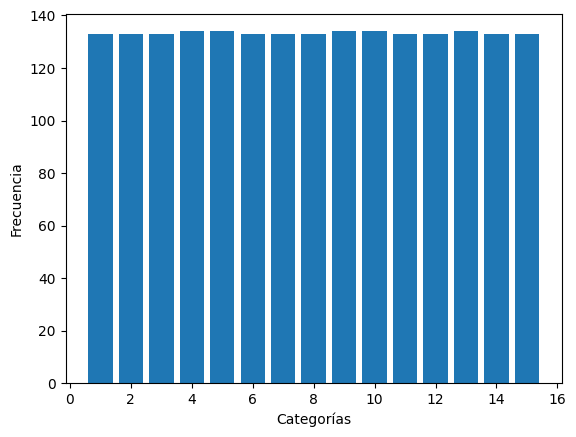

In [9]:
import matplotlib.pyplot as plt
# Paso 2: Extraer la columna objetivo de X_test
cats = X_test['CAT']

# Paso 3: Calcular la frecuencia de cada clase
class_counts = cats.value_counts()

# Paso 4: Graficar la distribución de clases
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

In [5]:
# Dividir z en z_train, z_val y z_test
z_train = z[idx_train]
z_val = z[idx_val]
z_test = z[idx_test]

In [ ]:
# Ajusta las columnas numéricas con StandardScaler
scaler_values = StandardScaler()
scaler_values.fit(X_train[['P','D','L','R']])

In [18]:
X_train[['P','D','L','R']] = scaler_values.transform(X_train[['P','D','L','R']])
X_val[['P','D','L','R']] = scaler_values.transform(X_val[['P','D','L','R']])
X_test[['P','D','L','R']] = scaler_values.transform(X_test[['P','D','L','R']])

NameError: name 'scaler_values' is not defined

In [6]:
X_train = X_train[['P','D','L','R']].values
X_val = X_val[['P','D','L','R']].values
X_test = X_test[['P','D','L','R']].values

In [13]:
np.savetxt("C:/Users/leand/Documents/LEANDRO/UBA/CEIA/PROYECTO DE GRADO/src/X_test.txt", X_test, fmt='%.6f')



In [20]:
print('tamaño X train_scaled', X_train.shape)
print('tamaño y train', y_train.shape)
print('tamaño z train', z_train.shape)


print('tamaño X val_scaled', X_val.shape)
print('tamaño y val', y_val.shape)
print('tamaño z val_scaled', z_val.shape)

print('tamaño X test_scaled', X_test.shape)
print('tamaño y test', y_test.shape)
print('tamaño z test', z_test.shape)

tamaño X train_scaled (5999, 4)
tamaño y train (5999, 41)
tamaño z train (5999, 41)
tamaño X val_scaled (2000, 4)
tamaño y val (2000, 41)
tamaño z val_scaled (2000, 41)
tamaño X test_scaled (2000, 4)
tamaño y test (2000, 41)
tamaño z test (2000, 41)


In [2]:
import torch
from torch.utils.data import DataLoader, Dataset

# Definir los conjuntos de datos
class MyDataset(Dataset):
    def __init__(self, X, y, z):
        self.X = X
        self.y = y
        self.z = z
    
    def __len__(self):
        return len(self.X)  # Devuelve el tamaño del conjunto de datos
    
    def __getitem__(self, index):
        # Obtener ejemplo y su longitud
        x = self.X[index]
        y = self.y[index]
        z = self.z[index]

        # Convertir a tensores de PyTorch y agregar dimensión adicional
        x = torch.tensor(x).float().unsqueeze(0)  # (1, 1, input_size)
        y = torch.tensor(y).long() # (1,)
        z = torch.tensor(z).long()  # (1,)

        return x, y, z


In [22]:
X_train.shape,y_train.shape,z_train.shape

((5999, 4), (5999, 41), (5999, 41))

In [23]:
train_ds = MyDataset(X_train, y_train, z_train)
valid_ds = MyDataset(X_val, y_val, z_val)
test_ds  = MyDataset(X_test, y_test, z_test)

In [24]:
# Pytorch utiliza DataLoader para entregar los dataset de a batches
train_dataloader = DataLoader(train_ds, batch_size = 64, shuffle= True)
valid_dataloader = DataLoader(valid_ds, batch_size=64)
test_dataloader = DataLoader(test_ds, batch_size=64)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definir dimensiones de entrada y salida
input_size = 4
hidden_size = 64

# Definir modelo

class seq2seqLSTM(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_decoder_tokens, num_layers=1):
        super(seq2seqLSTM, self).__init__()
        self.encoder_lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.decoder_embedding = nn.Embedding(num_decoder_tokens, 128)
        self.decoder_lstm = nn.LSTM(128, hidden_size, num_layers=1, batch_first=True)
        self.linear_layer = nn.Linear(hidden_size, num_decoder_tokens)

    def forward(self, inputs, dec_inputs):
        enc_output, (state_h, state_c) = self.encoder_lstm(inputs)
        embedding = self.decoder_embedding(dec_inputs)
        decoder_output, _ = self.decoder_lstm(embedding, (state_h, state_c))
        decoder_output = decoder_output.reshape(-1, decoder_output.shape[2])
        linear_output = self.linear_layer(decoder_output)
        # Remodela para que tenga el mismo número de pasos de tiempo que dec_inputs
        linear_output = linear_output.reshape(dec_inputs.shape[0], dec_inputs.shape[1], -1)
        return linear_output



model = seq2seqLSTM(input_size, hidden_size, num_decoder_tokens)

In [15]:
print(model)

seq2seqLSTM(
  (encoder_lstm): LSTM(4, 64, batch_first=True)
  (decoder_embedding): Embedding(41, 128)
  (decoder_lstm): LSTM(128, 64, batch_first=True)
  (linear_layer): Linear(in_features=64, out_features=41, bias=True)
)


In [16]:
total_params = sum(p.numel() for p in model.parameters())

# Imprimir el número total de parámetros
print(f"Número total de parámetros del modelo: {total_params}")

Número total de parámetros del modelo: 75497


In [28]:
import matplotlib.pyplot as plt

# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Inicializar listas para almacenar los valores de loss y accuracy
train_loss_list = []
val_loss_list = []
accuracy_list = []

# Entrenamiento
num_epochs = 150
for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    train_loss = 0
    for i, (inputs, labels, dec_inputs) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs, dec_inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dataloader)
    train_loss_list.append(train_loss)
    
    # Validación
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels, dec_inputs) in enumerate(valid_dataloader):
            outputs = model(inputs, dec_inputs)
            loss = criterion(outputs, labels.long())
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0) * labels.size(1)
            correct += (predicted == labels).sum().item()
    val_loss /= len(valid_dataloader)
    val_loss_list.append(val_loss)
    accuracy = 100 * correct / total
    accuracy_list.append(accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%')

Epoch 1/150, Train Loss: 3.6044, Validation Loss: 3.4638, Accuracy: 14.87%
Epoch 2/150, Train Loss: 3.3073, Validation Loss: 3.1692, Accuracy: 21.64%
Epoch 3/150, Train Loss: 3.0557, Validation Loss: 2.9502, Accuracy: 26.00%
Epoch 4/150, Train Loss: 2.8511, Validation Loss: 2.7622, Accuracy: 30.55%
Epoch 5/150, Train Loss: 2.6854, Validation Loss: 2.6224, Accuracy: 32.44%
Epoch 6/150, Train Loss: 2.5666, Validation Loss: 2.5196, Accuracy: 36.83%
Epoch 7/150, Train Loss: 2.4737, Validation Loss: 2.4347, Accuracy: 38.06%
Epoch 8/150, Train Loss: 2.3937, Validation Loss: 2.3608, Accuracy: 38.59%
Epoch 9/150, Train Loss: 2.3233, Validation Loss: 2.2937, Accuracy: 40.28%
Epoch 10/150, Train Loss: 2.2619, Validation Loss: 2.2361, Accuracy: 41.91%
Epoch 11/150, Train Loss: 2.2047, Validation Loss: 2.1787, Accuracy: 43.93%
Epoch 12/150, Train Loss: 2.1499, Validation Loss: 2.1259, Accuracy: 45.66%
Epoch 13/150, Train Loss: 2.0984, Validation Loss: 2.0750, Accuracy: 47.97%
Epoch 14/150, Train L

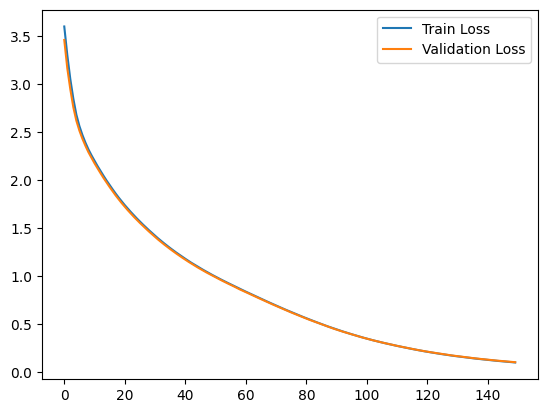

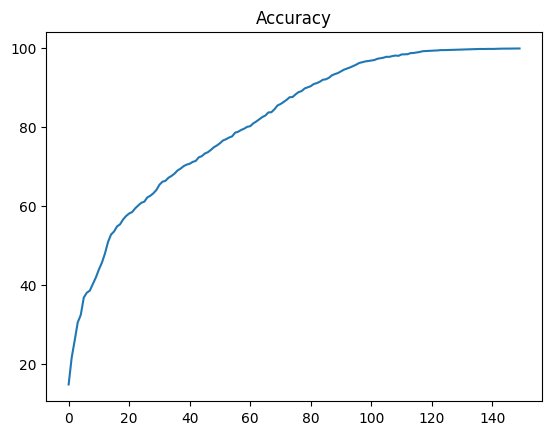

In [29]:
# Graficar loss y accuracy
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.legend()
plt.show()

plt.plot(accuracy_list)
plt.title('Accuracy')
plt.show()

In [27]:
ruta_modelo = 'C:\\Users\\leand\Documents\\LEANDRO\\UBA\\CEIA\\PROYECTO DE GRADO\\Modelos\\pytorch_lim_vocab\\seq2seqLSTM_model.pt'
model.load_state_dict(torch.load(ruta_modelo))

<All keys matched successfully>

In [28]:
def predictions(preds):
    preds_words = []
    for i in range(preds.shape[0]):
        preds_row = preds[i]
        preds_row_words = []
        for idx in preds_row:
            if idx in tokenizer.index_word:
                preds_row_words.append(tokenizer.index_word[idx])
        preds_words.append(preds_row_words)

    return preds_words


In [29]:
def predict_eval(model,test_dataloader,criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels, dec_inputs) in enumerate(test_dataloader):
            outputs = model(inputs, dec_inputs)
            loss = criterion(outputs, labels.long())
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0) * labels.size(1)
            correct += (predicted == labels).sum().item()
    test_loss /= len(test_dataloader)
    accuracy = 100 * correct / total

    print(f'Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return predicted.numpy()

In [31]:
frasesnlg = predictions(predicted.numpy())
print(frasesnlg)

[['cuando', 'estés', 'muy', 'lejos', 'de', 'la', 'pared', 'y', 'te', 'estás', 'alejando', 'aun', 'más', 'de', 'ella', 'gira', 'tu', 'rueda', 'izquierda', 'muy', 'rápido', 'hacia', 'delante', 'y', 'gira', 'tu', 'rueda', 'derecha', 'más', 'o', 'menos', 'rápido', 'hacia', 'atrás'], ['cuando', 'estés', 'muy', 'lejos', 'de', 'la', 'pared', 'y', 'te', 'estás', 'alejando', 'aun', 'más', 'de', 'ella', 'gira', 'tu', 'rueda', 'izquierda', 'muy', 'rápido', 'hacia', 'delante', 'y', 'gira', 'tu', 'rueda', 'derecha', 'más', 'o', 'menos', 'rápido', 'hacia', 'atrás'], ['cuando', 'estés', 'muy', 'lejos', 'de', 'la', 'pared', 'pero', 'te', 'estás', 'acercando', 'a', 'ella', 'gira', 'tu', 'rueda', 'izquierda', 'rápidamente', 'hacia', 'delante', 'y', 'gira', 'tu', 'rueda', 'derecha', 'muy', 'lento', 'hacia', 'atrás'], ['cuando', 'estés', 'cerca', 'a', 'la', 'pared', 'y', 'te', 'estás', 'acercando', 'más', 'a', 'ella', 'gira', 'tu', 'rueda', 'izquierda', 'muy', 'rápido', 'hacia', 'atrás', 'y', 'gira', 'tu'

In [33]:
preds = predict_eval(model,test_dataloader,criterion)

Test Loss: 0.1027, Accuracy: 99.87%


In [34]:
frasestest = predictions(preds)
for i in range(len(frasestest)-1):
    print(frasestest[i])

['cuando', 'estés', 'cerca', 'a', 'la', 'pared', 'y', 'te', 'estás', 'acercando', 'más', 'a', 'ella', 'gira', 'tu', 'rueda', 'izquierda', 'muy', 'rápido', 'hacia', 'atrás', 'y', 'gira', 'tu', 'rueda', 'derecha', 'muy', 'rápido', 'hacia', 'delante']
['cuando', 'estés', 'muy', 'cerca', 'a', 'la', 'pared', 'pero', 'ni', 'te', 'acercas', 'más', 'ni', 'te', 'alejas', 'de', 'ella', 'gira', 'tu', 'rueda', 'izquierda', 'despacito', 'hacia', 'atrás', 'y', 'gira', 'tu', 'rueda', 'derecha', 'despacito', 'hacia', 'atrás']
['cuando', 'estés', 'muy', 'lejos', 'de', 'la', 'pared', 'pero', 'ni', 'te', 'alejas', 'más', 'ni', 'te', 'acercas', 'a', 'ella', 'gira', 'tu', 'rueda', 'izquierda', 'bastante', 'rápido', 'hacia', 'delante', 'y', 'gira', 'tu', 'rueda', 'derecha', 'despacito', 'hacia', 'atrás']
['cuando', 'estés', 'muy', 'lejos', 'de', 'la', 'pared', 'y', 'te', 'estás', 'alejando', 'aun', 'más', 'de', 'ella', 'gira', 'tu', 'rueda', 'izquierda', 'muy', 'rápido', 'hacia', 'delante', 'y', 'gira', 'tu

In [75]:
torch.save(model.state_dict(), 'C:\\Users\\leand\Documents\\LEANDRO\\UBA\\CEIA\\PROYECTO DE GRADO\\Modelos\\pytorch_lim_vocab\\seq2seqLSTM_model.pt')

In [74]:
import json

# Obtén la configuración del tokenizer
tokenizer_config = tokenizer.to_json()

# Guarda la configuración en un archivo JSON
with open('C:\\Users\\leand\\Documents\\LEANDRO\\UBA\\CEIA\\PROYECTO DE GRADO\src\\tokenizer.json', 'w') as json_file:
    json_file.write(tokenizer_config)

In [65]:
prueba_de = np.array([0.05123237,-0.99533163,0.5028787,-0.01450637])
target = np.array([36, 23, 4, 14, 15, 26, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
model.eval()
test_in = torch.tensor(prueba_de.reshape(1,1,4)).float()
dec_test_in = torch.tensor(target).long().unsqueeze(0)

In [58]:
test_in, dec_test_in

(tensor([[[-0.9410,  0.7412,  0.5902, -0.0803]]]),
 tensor([[15, 27, 32,  4, 14, 15, 26,  4,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0]]))

In [46]:
X_test[2],z_test[2]

(array([ 0.92244163, -0.63061558, -0.17575274, -0.12418619]),
 array([14, 25, 14, 26,  4,  9, 14, 26,  4,  9,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0]))

In [47]:
test_in = torch.tensor(X_test[0].reshape(1,1,4)).float()
dec_test_in = torch.tensor(z_test[0]).long().unsqueeze(0)

In [53]:
# Hacer predicciones con el modelo cargado
with torch.no_grad():
    prediction = model(test_in, dec_test_in)
    _, predicts = torch.max(prediction.data, 1)
    

# Imprimir las predicciones
print(predicts)

tensor([[11, 12, 29,  9,  9, 17, 22, 24, 23, 30,  8, 18, 17,  2,  3, 13, 13, 25,
          5, 16,  7,  2, 17,  3, 14, 15, 28,  5, 16,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1]])


In [67]:
predicciones_finales = predictions(dec_test_in.numpy())

In [68]:
predicciones_finales

[['medio', 'rápido', 'hacia', 'muy', 'delante', 'lento', 'hacia', 'atrás']]

In [69]:
tokenizer.word_index

{'gira': 1,
 'tu': 2,
 'rueda': 3,
 'hacia': 4,
 'te': 5,
 'y': 6,
 'a': 7,
 'la': 8,
 'atrás': 9,
 'cuando': 10,
 'estés': 11,
 'izquierda': 12,
 'derecha': 13,
 'muy': 14,
 'delante': 15,
 'pared': 16,
 'ella': 17,
 'de': 18,
 'despacito': 19,
 'pero': 20,
 'estás': 21,
 'ni': 22,
 'rápido': 23,
 'más': 24,
 'cerca': 25,
 'lento': 26,
 'lejos': 27,
 'acercando': 28,
 'alejando': 29,
 'alejas': 30,
 'acercas': 31,
 'rápidamente': 32,
 'bastante': 33,
 'distancia': 34,
 'requerida': 35,
 'medio': 36,
 'aún': 37,
 'aun': 38,
 'o': 39,
 'menos': 40}